<a href="https://colab.research.google.com/github/RamonPonce/SOMETHING/blob/main/CAP4613Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google colab link: https://colab.research.google.com/drive/1--RSuidIwsXCTokYC1oqtpdbU3lb_qh8?usp=sharing

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from random import randint

(x_train, y_train), (x_test, y_test) = mnist.load_data()
classes=[0,3,8]
x_train_038=x_train[np.logical_or.reduce((y_train==0,y_train==3,y_train==8)),0:28,0:28]
y_train_038=y_train[np.logical_or.reduce((y_train==0,y_train==3,y_train==8))]

x_test_038=x_test[np.logical_or.reduce((y_test==0,y_test==3,y_test==8)),0:28,0:28]
y_test_038=y_test[np.logical_or.reduce((y_test==0,y_test==3,y_test==8))]

num_train_img=x_train_038.shape[0]
train_ind=np.arange(0,num_train_img)
train_ind_s=np.random.permutation(train_ind)
x_train_038=x_train_038[train_ind_s,:,:]
y_train_038=y_train_038[train_ind_s]

x_val_038=x_train_038[0:500,:,:]
y_val_038=y_train_038[0:500]
x_train_038=x_train_038[500:,:,:]
y_train_038=y_train_038[500:]

def feat_extract(images):
  width=images.shape[1]
  height=images.shape[2]
  features=np.zeros((images.shape[0],4))
  features_temp=np.sum(images[:,0:int(width/2),0:int(height/2)],axis=2)
  features[:,0]=np.sum(features_temp,axis=1)/(width*height/4)
  features_temp=np.sum(images[:,0:int(width/2),int(height/2):],axis=2)
  features[:,1]=np.sum(features_temp,axis=1)/(width*height/4)
  features_temp=np.sum(images[:,int(width/2):,0:int(height/2)],axis=2)
  features[:,2]=np.sum(features_temp,axis=1)/(width*height/4)
  features_temp=np.sum(images[:,int(width/2):,int(height/2):],axis=2)
  features[:,3]=np.sum(features_temp,axis=1)/(width*height/4)
  return features


def feat_plot(features, labels, classes):
  for i, class_i in enumerate(classes):
    plt.plot(features[labels[:]==classes[i],0],
             features[labels[:]==classes[i],1],'o', markersize=15)

  plt.xlabel('x: Feature 1')
  plt.ylabel('y: Feature 2')
  plt.legend(['Class'+str(classes[i]) for i in range(len(classes))])
  plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


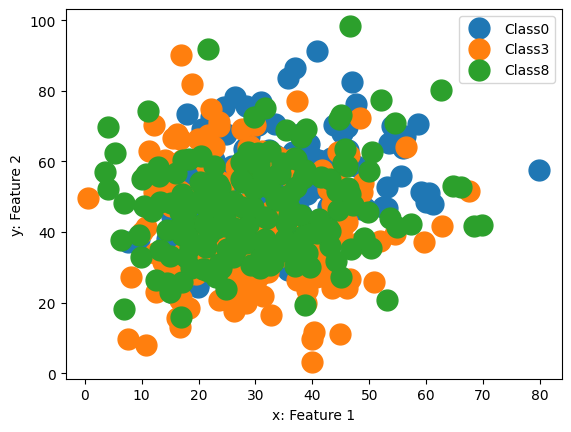

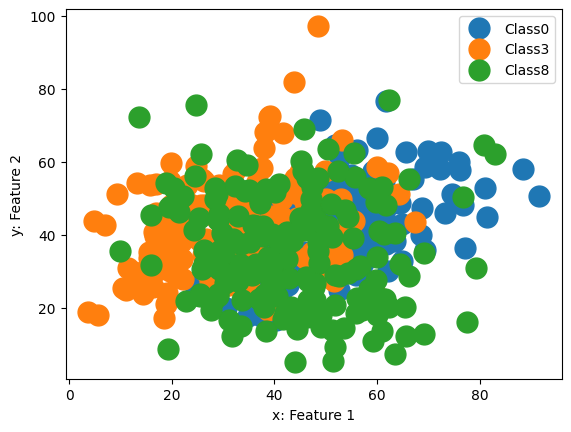

In [3]:
feature_train=feat_extract(x_train_038)
feature_val=feat_extract(x_val_038)
feature_test=feat_extract(x_test_038)

feat_plot(feature_train[1:500, 0:2], y_train_038[1:500], classes)
feat_plot(feature_train[1:500, 2:4], y_train_038[1:500], classes)


In [15]:
from tensorflow.keras.utils import to_categorical

# vectorizing because 0 3 8 as class values throw off the classification
class_mapping = {0: 0, 3: 1, 8: 2} #mapping for making the matrix
y_train_038_mapped = np.vectorize(class_mapping.get)(y_train_038)
y_val_038_mapped = np.vectorize(class_mapping.get)(y_val_038)
y_test_038_mapped = np.vectorize(class_mapping.get)(y_test_038)

y_train_038_cat = to_categorical(y_train_038_mapped, len(classes))
y_val_038_cat = to_categorical(y_val_038_mapped, len(classes))
y_test_038_cat = to_categorical(y_test_038_mapped, len(classes))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3619 - loss: 2.0367
Epoch 2/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3344 - loss: 1.4197
Epoch 3/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3394 - loss: 1.2123
Epoch 4/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3623 - loss: 1.1403
Epoch 5/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4491 - loss: 1.0815
Epoch 6/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4830 - loss: 1.0573
Epoch 7/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5053 - loss: 1.0392
Epoch 8/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5289 - loss: 1.0223
Epoch 9/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5424 - loss: 1.0076
Epoch 10/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5523 - loss: 0.9987
Epoch 11/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5586 - loss: 0.9902
Epoch 12/30
1088/1088 ━━━━━━━━

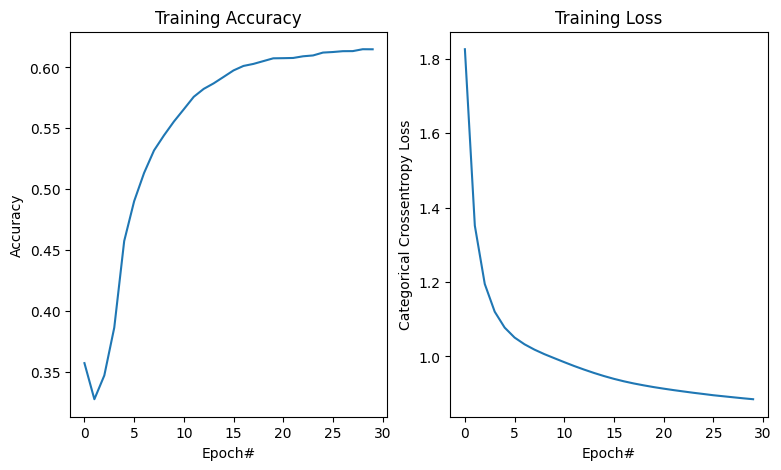

In [5]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

def plot_curve(accuracy_train,loss_train):
  epochs=np.arange(len(loss_train))
  plt.subplot(1,2,1)
  plt.plot(epochs,accuracy_train)
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')

  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train)
  plt.xlabel('Epoch#')
  plt.ylabel('Categorical Crossentropy Loss')
  plt.title('Training Loss')
  plt.show()

model=Sequential()
model.add(Dense(input_dim=4, units=16, activation='tanh'))
model.add(Dense(units=3, activation='softmax')) #output layer, I know assignment asks for one layer so I assumed it meant one hidden layer, excluding the output layer
model.summary()

opt=tf.keras.optimizers.SGD(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) #categorical crossentropy instead of binary because there are more than 2 classes

history=model.fit(feature_train, y_train_038_cat, batch_size=16, epochs=30, verbose=1) #validation_data=(feature_val, y_val_038_cat))

score=model.evaluate(feature_train, y_train_038_cat)
print('Training loss:', score[0])
print('Training accuracy:', score[1])

score=model.evaluate(feature_val, y_val_038_cat)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

plt.figure(figsize=[9,5])
acc_curve=history.history['accuracy']
loss_curve=history.history['loss']
plot_curve(acc_curve,loss_curve)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515 (2.01 KB)

 Trainable params: 515 (2.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3940 - loss: 1.2359
Epoch 2/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5504 - loss: 1.0197
Epoch 3/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5854 - loss: 0.9517
Epoch 4/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6085 - loss: 0.9145
Epoch 5/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6113 - loss: 0.8974
Epoch 6/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6143 - loss: 0.8801
Epoch 7/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6234 - loss: 0.8665
Epoch 8/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6234 - loss: 0.8571
Epoch 9/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6258 - loss: 0.8463
Epoch 10/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6405 - loss: 0.8254
Epoch 11/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6317 - loss: 0.8274
Epoch 12/30
1088/1088 ━━━━━━━━

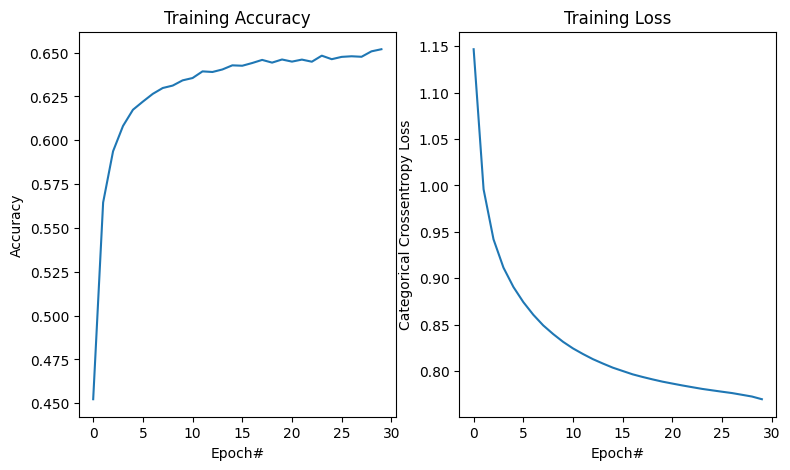

In [6]:
model1=Sequential()
model1.add(Dense(input_dim=4, units=64, activation='tanh'))
model1.add(Dense(units=3, activation='softmax')) #output layer, I know assignment asks for one layer so I assumed it meant one hidden layer, excluding the output layer
model1.summary()

opt=tf.keras.optimizers.SGD(learning_rate=0.0001)
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) #categorical crossentropy instead of binary because there are more than 2 classes

history=model1.fit(feature_train, y_train_038_cat, batch_size=16, epochs=30, verbose=1) #validation_data=(feature_val, y_val_038_cat))

score=model1.evaluate(feature_train, y_train_038_cat)
print('Training loss:', score[0])
print('Training accuracy:', score[1])

score=model1.evaluate(feature_val, y_val_038_cat)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

plt.figure(figsize=[9,5])
acc_curve=history.history['accuracy']
loss_curve=history.history['loss']
plot_curve(acc_curve,loss_curve)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,027 (4.01 KB)

 Trainable params: 1,027 (4.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4064 - loss: 1.1544
Epoch 2/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5430 - loss: 0.9484
Epoch 3/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6080 - loss: 0.8912
Epoch 4/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6090 - loss: 0.8699
Epoch 5/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6238 - loss: 0.8397
Epoch 6/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6263 - loss: 0.8211
Epoch 7/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6294 - loss: 0.8150
Epoch 8/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6313 - loss: 0.8050
Epoch 9/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6458 - loss: 0.7921
Epoch 10/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6462 - loss: 0.7881
Epoch 11/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6451 - loss: 0.7784
Epoch 12/30
1088/1088 ━━━━━━━━

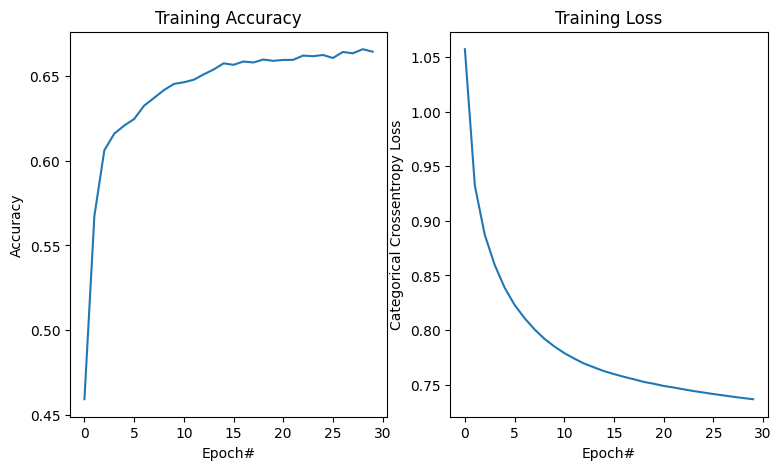

In [7]:
model2=Sequential()
model2.add(Dense(input_dim=4, units=128, activation='tanh'))
model2.add(Dense(units=3, activation='softmax')) #output layer, I know assignment asks for one layer so I assumed it meant one hidden layer, excluding the output layer
model2.summary()

opt=tf.keras.optimizers.SGD(learning_rate=0.0001)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) #categorical crossentropy instead of binary because there are more than 2 classes

history=model2.fit(feature_train, y_train_038_cat, batch_size=16, epochs=30, verbose=1) #validation_data=(feature_val, y_val_038_cat))

score=model2.evaluate(feature_train, y_train_038_cat)
print('Training loss:', score[0])
print('Training accuracy:', score[1])

score=model2.evaluate(feature_val, y_val_038_cat)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

plt.figure(figsize=[9,5])
acc_curve=history.history['accuracy']
loss_curve=history.history['loss']
plot_curve(acc_curve,loss_curve)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,755 (10.76 KB)

 Trainable params: 2,755 (10.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4506 - loss: 1.0172
Epoch 2/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6011 - loss: 0.9055
Epoch 3/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6304 - loss: 0.8682
Epoch 4/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6466 - loss: 0.8394
Epoch 5/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6504 - loss: 0.8184
Epoch 6/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6458 - loss: 0.8098
Epoch 7/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6556 - loss: 0.7976
Epoch 8/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6508 - loss: 0.7937
Epoch 9/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6560 - loss: 0.7870
Epoch 10/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6582 - loss: 0.7799
Epoch 11/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6614 - loss: 0.7727
Epoch 12/30
1088/1088 ━━━━━━━━

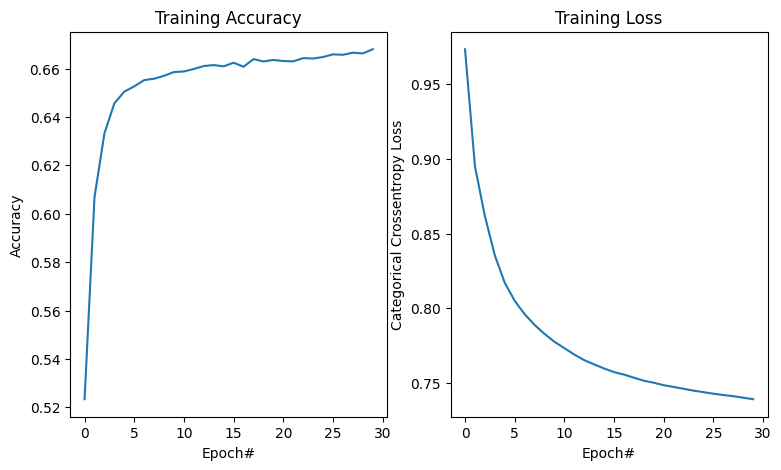

In [8]:
model3=Sequential()
model3.add(Dense(input_dim=4, units=128, activation='tanh'))
model3.add(Dense(units=16, activation='tanh'))
model3.add(Dense(units=3, activation='softmax')) #output layer, I know assignment asks for one layer so I assumed it meant one hidden layer, excluding the output layer
model3.summary()

opt=tf.keras.optimizers.SGD(learning_rate=0.0001)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) #categorical crossentropy instead of binary because there are more than 2 classes

history=model3.fit(feature_train, y_train_038_cat, batch_size=16, epochs=30, verbose=1) #validation_data=(feature_val, y_val_038_cat))

score=model3.evaluate(feature_train, y_train_038_cat)
print('Training loss:', score[0])
print('Training accuracy:', score[1])

score=model3.evaluate(feature_val, y_val_038_cat)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

plt.figure(figsize=[9,5])
acc_curve=history.history['accuracy']
loss_curve=history.history['loss']
plot_curve(acc_curve,loss_curve)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,091 (35.51 KB)

 Trainable params: 9,091 (35.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4395 - loss: 1.0811
Epoch 2/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5916 - loss: 0.9298
Epoch 3/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6430 - loss: 0.8554
Epoch 4/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6482 - loss: 0.8258
Epoch 5/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6503 - loss: 0.8042
Epoch 6/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6557 - loss: 0.7843
Epoch 7/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6562 - loss: 0.7762
Epoch 8/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6604 - loss: 0.7701
Epoch 9/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6610 - loss: 0.7617
Epoch 10/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6628 - loss: 0.7632
Epoch 11/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6605 - loss: 0.7536
Epoch 12/30
1088/1088 ━━━━━━━━

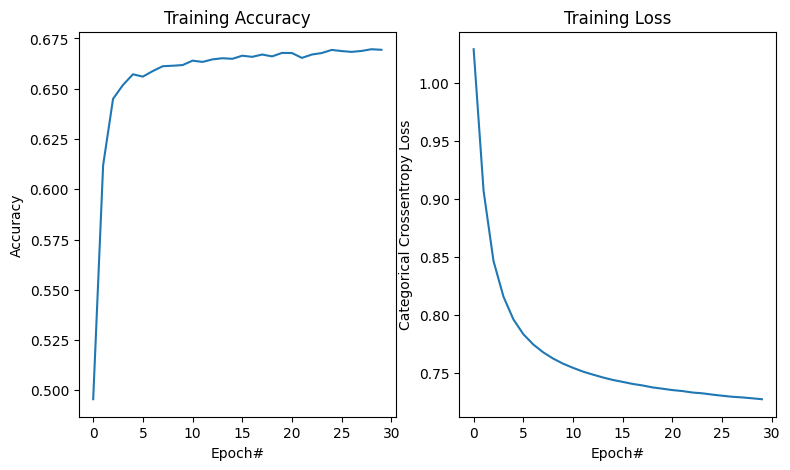

In [9]:
model4=Sequential()
model4.add(Dense(input_dim=4, units=128, activation='tanh'))
model4.add(Dense(units=64, activation='tanh'))
model4.add(Dense(units=3, activation='softmax')) #output layer, I know assignment asks for one layer so I assumed it meant one hidden layer, excluding the output layer
model4.summary()

opt=tf.keras.optimizers.SGD(learning_rate=0.0001)
model4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) #categorical crossentropy instead of binary because there are more than 2 classes

history=model4.fit(feature_train, y_train_038_cat, batch_size=16, epochs=30, verbose=1) #validation_data=(feature_val, y_val_038_cat))

score=model4.evaluate(feature_train, y_train_038_cat)
print('Training loss:', score[0])
print('Training accuracy:', score[1])

score=model4.evaluate(feature_val, y_val_038_cat)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

plt.figure(figsize=[9,5])
acc_curve=history.history['accuracy']
loss_curve=history.history['loss']
plot_curve(acc_curve,loss_curve)

In [10]:
import pandas as pd

# Define the data for the table
data = {
    'Model': ['16 nodes', '64 nodes', '128 nodes', '128 nodes + 16 nodes', '128 nodes + 64 nodes'],
    'Training Accuracy': ['62%', '65%', '67%', '67%', '67%'],
    'Training Loss': ['88%', '77%', '74%', '74%', '73%'],
    'Validation Accuracy': ['62%', '67%', '67%', '65%', '67%'],
    'Validation Loss': ['88%', '75%', '72%', '73%', '71%']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the table
print(df)

                  Model Training Accuracy Training Loss Validation Accuracy  \
0              16 nodes               62%           88%                 62%   
1              64 nodes               65%           77%                 67%   
2             128 nodes               67%           74%                 67%   
3  128 nodes + 16 nodes               67%           74%                 65%   
4  128 nodes + 64 nodes               67%           73%                 67%   

  Validation Loss  
0             88%  
1             75%  
2             72%  
3             73%  
4             71%  


In [ ]:
# In both the training lost and validation lost, with more neurons and hidden layers, the loss percentage was slowly but steadily declining.
# However, to reach 0% loss I predict it would be very inefficient due to the time and amount of resources that would most likely be required.
# Based on the table, I believe the 128 single layer or 128 + 64 double layer models are the most effective.
# Between the two, I think the double layer with more training is most likely to be better, which is why I chose it for the testing data of this assignment.

In [16]:
score=model4.evaluate(feature_test, y_test_038_cat)
print('Testing loss:', score[0])
print('Testing accuracy:', score[1])

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6606 - loss: 0.7362
Testing loss: 0.7292954325675964
Testing accuracy: 0.6619433164596558


In [ ]:
# The model with 2 hidden layers of 128 and 64 nodes ended up getting an accuracy of 66% on the testing data which based on training and validation is expected.
# The loss was kept to 73%, also expected. I believe if the training was done with more epochs and a bigger batch size, percentages would be increased.